### NDArray
In the following cells you learn how to create the low level mxnet NDArrays. 

In [1]:
import mxnet as mx
from mxnet import nd
import numpy as np

In [2]:
a=nd.array(((10,20,30),
          (40,50,60)))

In [3]:
a.shape

(2, 3)

In [4]:
a.size

6

In [5]:
a.dtype

numpy.float32

In [6]:
b=nd.ones((2,3))
b


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [7]:
c=nd.random.uniform (-1,1, (2,3))
c


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

In [8]:
d=nd.full((2,3), 10)
d


[[10. 10. 10.]
 [10. 10. 10.]]
<NDArray 2x3 @cpu(0)>

We can run element level operations on the ndarrays:

In [9]:
a,b,a-b, a+b

(
 [[10. 20. 30.]
  [40. 50. 60.]]
 <NDArray 2x3 @cpu(0)>,
 
 [[1. 1. 1.]
  [1. 1. 1.]]
 <NDArray 2x3 @cpu(0)>,
 
 [[ 9. 19. 29.]
  [39. 49. 59.]]
 <NDArray 2x3 @cpu(0)>,
 
 [[11. 21. 31.]
  [41. 51. 61.]]
 <NDArray 2x3 @cpu(0)>)

One property that is not available in the Numpy ndarray is running mxnet ndarray in a context of either in CPU or GPU.  That is stored in the context property of an mxnet ndarray and is available as shown below:

In [10]:
a.context

cpu(0)

When we convert an mxnet ndarray to numpy ndarray, it will loss its device context. As you see, in the following example, we do not have device context in the a_numpy anymore:

In [11]:
a_numpy=a.asnumpy()
a_numpy

array([[10., 20., 30.],
       [40., 50., 60.]], dtype=float32)

In mxnet, when we transpose an ndarray, we ceate a new copy of the data:

In [12]:
d


[[10. 10. 10.]
 [10. 10. 10.]]
<NDArray 2x3 @cpu(0)>

In [13]:
e=d.T

In [14]:
e,d

(
 [[10. 10.]
  [10. 10.]
  [10. 10.]]
 <NDArray 3x2 @cpu(0)>,
 
 [[10. 10. 10.]
  [10. 10. 10.]]
 <NDArray 2x3 @cpu(0)>)

----------------------------

### Symbol API
In mxnet we can create computational graphs by Symbol API. Let's try the Symbol API

In [15]:
import mxnet as mx
from mxnet import nd
import symbol as sym


We create a variable and later we "bind" a value to it. At the begining it is free, meaning it is not bounded to any value. We want to create a symbol for the following equation:  $$result=x*y+z$$

In [16]:
x=mx.sym.Variable('X')
x

<Symbol X>

In [17]:
y=mx.sym.Variable('Y')

In [18]:
z=mx.sym.Variable('z')


Now let's create a computation graph for the "result"

In [19]:
result=(x.__mul__(y).__add__(z))

In [20]:
result

<Symbol _plus0>

The $ plus0 $ in above output is the name of the symbol that mxnet has assigned to this graph.

To see the list of arguments in the computation graph:

In [21]:
result.list_arguments()

['X', 'Y', 'z']

We can also start adding a few operations by the variables we created above:

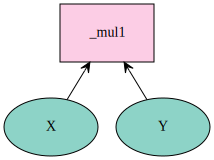

In [22]:
mul=x*y
mx.viz.plot_network (symbol=mul)

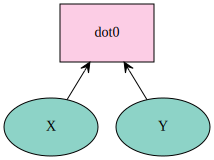

In [23]:
dot=mx.sym.dot(x,y)
mx.viz.plot_network (symbol=dot)

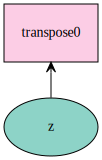

In [24]:
zt=z.transpose()
mx.viz.plot_network (symbol=zt)

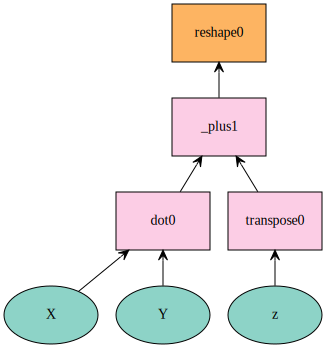

In [25]:
reshape= mx.sym.reshape(dot+zt, shape=(1,4))

mx.viz.plot_network (symbol=reshape)

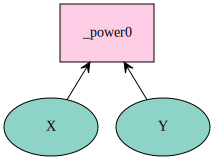

In [26]:
f=x.__pow__(y)
mx.viz.plot_network (symbol=f)

Now let's bind data to this computation graph. First we create two nd array and we bind them to the graph

In [27]:
x_data=mx.nd.array([1,1], dtype=np.float32 )
y_data=mx.nd.array([2,2], dtype=np.float32 )

In [28]:
executor=dot.bind(ctx=mx.cpu(), args={'X' : x_data , 'Y' : y_data})

Now that we bind the data, we need to execute the variable that holds the binding:

In [29]:
output=executor.forward()

In [30]:
output

[
 [4.]
 <NDArray 1 @cpu(0)>]

In [31]:
executor=f.bind(ctx=mx.cpu(), args={'X' : mx.nd.array([2]) , 'Y' : mx.nd.array([3])})

In [32]:
output=executor.forward()

In [33]:
output

[
 [8.]
 <NDArray 1 @cpu(0)>]

--------------------

### Data Iterators

In NNs we have lots of data and sometimes we cannot fit them all in the memory. We have a way to load them in batches in mxnet. That is called <b> data iterators</b>.

In [34]:
import mxnet as mx
from mxnet import ndarray as nd
import numpy as np

In [35]:
data = np.random.rand(100,3)
print (data)




[[0.69893573 0.27286447 0.00636046]
 [0.2266227  0.10979496 0.78410686]
 [0.29037437 0.19535547 0.84062948]
 [0.7744229  0.70740907 0.17973986]
 [0.7058874  0.06338648 0.99296362]
 [0.96559656 0.8373479  0.21506172]
 [0.0408786  0.95114976 0.41025171]
 [0.85026764 0.07096796 0.72334988]
 [0.47647814 0.12304065 0.37314949]
 [0.14254549 0.97465679 0.05358129]
 [0.0243768  0.86400479 0.42038796]
 [0.37580911 0.04649166 0.86592966]
 [0.65684243 0.46030775 0.16496258]
 [0.98897025 0.78102005 0.87009612]
 [0.14732302 0.12388051 0.32655982]
 [0.14830435 0.18320655 0.39670216]
 [0.22883493 0.25413341 0.82465278]
 [0.00265841 0.62524789 0.9298937 ]
 [0.46868302 0.6941619  0.36806866]
 [0.83131776 0.6336289  0.14560788]
 [0.09771494 0.55607379 0.89527803]
 [0.71289123 0.14029984 0.64847919]
 [0.71819467 0.93116798 0.21810743]
 [0.56242211 0.53776291 0.79499396]
 [0.13184166 0.68523655 0.84586017]
 [0.06136608 0.9673616  0.00973287]
 [0.56871521 0.43007567 0.50827214]
 [0.78896484 0.84020632 0.78

In [36]:
label = np.random.randint(0, 10, (100,))
print(label)

[6 0 4 2 3 8 2 1 8 5 5 8 7 0 6 1 6 4 9 8 8 1 8 7 9 6 2 4 6 5 6 2 7 7 9 8 1
 6 1 2 2 2 7 6 4 4 1 1 2 5 8 6 6 7 6 2 1 2 2 9 6 1 7 7 4 6 4 9 7 1 5 1 4 7
 4 4 8 8 0 3 8 1 6 0 9 6 6 4 3 1 8 0 2 5 3 7 9 5 3 8]


In [37]:
data_iter = mx.io.NDArrayIter(data=data, label=label, batch_size=30)
for batch in data_iter:
    print([batch.data, batch.label, batch.pad])

[[
[[0.69893575 0.27286446 0.00636045]
 [0.2266227  0.10979497 0.78410685]
 [0.29037437 0.19535547 0.84062946]
 [0.7744229  0.7074091  0.17973986]
 [0.7058874  0.06338648 0.9929636 ]
 [0.96559656 0.8373479  0.21506172]
 [0.0408786  0.95114976 0.4102517 ]
 [0.85026765 0.07096796 0.72334987]
 [0.47647813 0.12304065 0.37314948]
 [0.14254549 0.9746568  0.05358129]
 [0.0243768  0.8640048  0.42038795]
 [0.3758091  0.04649166 0.86592966]
 [0.6568424  0.46030775 0.16496257]
 [0.9889702  0.78102005 0.87009615]
 [0.14732301 0.12388051 0.3265598 ]
 [0.14830434 0.18320656 0.39670217]
 [0.22883493 0.2541334  0.8246528 ]
 [0.00265841 0.6252479  0.9298937 ]
 [0.468683   0.6941619  0.36806867]
 [0.8313178  0.6336289  0.14560787]
 [0.09771494 0.5560738  0.89527804]
 [0.7128912  0.14029984 0.64847916]
 [0.71819466 0.93116796 0.21810743]
 [0.5624221  0.5377629  0.79499394]
 [0.13184166 0.6852366  0.8458602 ]
 [0.06136608 0.96736157 0.00973288]
 [0.5687152  0.43007568 0.5082721 ]
 [0.7889648  0.8402063  0

--------------------- 

### Modules API
In this section we want to talk about mxnet modules. We use the example in this URL:
https://julsimon.medium.com/an-introduction-to-the-mxnet-api-part-3-1803112ba3a8

Module wraps a <b>Symbol</b> and one or more <b>Executors</b>. It has both a high level and intermediate level API. Imagine:<br>
1) Our data set is composed of 1000 data samples.<br>
2) Each sample has 100 features.<br>
3) A feature is represented by a float value between 0 and 1.<br>
4) Samples are split in 10 categories. The purpose of the network will be to predict the correct category for a given sample.<br>
5) We’ll use 800 samples for training and 200 samples for validation.<br>
6) We’ll use a batch size of 10 for training and validation.<br>

In [38]:
import mxnet as mx
import numpy as np
import logging

logging.basicConfig(level=logging.INFO)

sample_count = 1000
train_count = 800
valid_count = sample_count - train_count
feature_count = 100
category_count = 10
batch=10
#mod = mx.mod.Module(out)

Let’s use a uniform distribution to generate the 1000 samples. They are stored in an NDArray named ‘X’: 1000 lines, 100 columns.

In [39]:
X = mx.nd.uniform(low=0, high=1, shape=(sample_count,feature_count))

In [40]:
X


[[5.44883192e-01 8.47251713e-01 4.23654795e-01 ... 6.34274065e-01
  4.17021990e-01 9.97184813e-01]
 [7.20324516e-01 9.32557344e-01 1.14381080e-04 ... 1.85082078e-01
  2.59262286e-02 9.31540847e-01]
 [5.49662471e-01 9.47730601e-01 4.35322404e-01 ... 8.39949071e-01
  2.90904731e-01 1.21328577e-01]
 ...
 [8.18738341e-02 2.44539641e-02 8.53825390e-01 ... 6.76115692e-01
  1.75401583e-01 9.24937129e-01]
 [3.79189700e-01 8.49168241e-01 7.75433898e-01 ... 4.59736548e-02
  5.40907323e-01 8.03755522e-01]
 [5.59466481e-01 9.35443759e-01 5.55880964e-01 ... 1.00363605e-01
  9.17030871e-01 4.12768424e-01]]
<NDArray 1000x100 @cpu(0)>

Now we want to generate the labels (Y). The Y are the categories for these 1000 samples and they are represented as integers in the 0–9 range. They are randomly generated and stored in an NDArray named ‘Y’.

In [41]:
Y = mx.nd.empty((sample_count,))
for i in range(0,sample_count-1):
  Y[i] = np.random.randint(0,category_count)

In [42]:
Y


[3.0000000e+00 0.0000000e+00 9.0000000e+00 8.0000000e+00 8.0000000e+00
 6.0000000e+00 7.0000000e+00 9.0000000e+00 4.0000000e+00 9.0000000e+00
 1.0000000e+00 4.0000000e+00 5.0000000e+00 3.0000000e+00 9.0000000e+00
 6.0000000e+00 2.0000000e+00 6.0000000e+00 1.0000000e+00 6.0000000e+00
 8.0000000e+00 6.0000000e+00 5.0000000e+00 8.0000000e+00 0.0000000e+00
 4.0000000e+00 0.0000000e+00 4.0000000e+00 5.0000000e+00 2.0000000e+00
 8.0000000e+00 7.0000000e+00 4.0000000e+00 3.0000000e+00 3.0000000e+00
 0.0000000e+00 3.0000000e+00 1.0000000e+00 1.0000000e+00 9.0000000e+00
 2.0000000e+00 9.0000000e+00 0.0000000e+00 3.0000000e+00 7.0000000e+00
 5.0000000e+00 2.0000000e+00 2.0000000e+00 8.0000000e+00 8.0000000e+00
 9.0000000e+00 7.0000000e+00 7.0000000e+00 1.0000000e+00 9.0000000e+00
 9.0000000e+00 8.0000000e+00 9.0000000e+00 6.0000000e+00 7.0000000e+00
 5.0000000e+00 8.0000000e+00 7.0000000e+00 9.0000000e+00 5.0000000e+00
 6.0000000e+00 4.0000000e+00 2.0000000e+00 7.0000000e+00 7.0000000e+00
 8.00

Next, we’re splitting the data set <b>80/20</b> for training and validation. We use the <b>NDArray.crop</b> function to do this. Here, the data set is completely random, so we can use the top 80% for training and the bottom 20% for validation. In real life, we’d probably shuffle the data set first, in order to avoid potential bias on sequentially-generated data.

In [43]:
X_train = mx.nd.crop(X, begin=(0,0), end=(train_count,feature_count-1))
X_valid = mx.nd.crop(X, begin=(train_count,0), end=(sample_count,feature_count-1))
Y_train = Y[0:train_count]
Y_valid = Y[train_count:sample_count]

In [44]:
X_train,Y_train

(
 [[5.4488319e-01 8.4725171e-01 4.2365479e-01 ... 4.3860152e-01
   6.3427407e-01 4.1702199e-01]
  [7.2032452e-01 9.3255734e-01 1.1438108e-04 ... 4.3599489e-01
   1.8508208e-01 2.5926229e-02]
  [5.4966247e-01 9.4773060e-01 4.3532240e-01 ... 7.0814782e-01
   8.3994907e-01 2.9090473e-01]
  ...
  [6.1241025e-01 3.3565557e-01 5.1378232e-01 ... 2.5242317e-02
   4.5300153e-01 4.9613327e-01]
  [1.8546613e-01 7.9761771e-03 1.0658611e-01 ... 1.4423901e-01
   4.0589385e-02 2.5427176e-02]
  [4.8193234e-01 5.3407621e-01 5.2616858e-01 ... 7.7467811e-01
   6.3737631e-01 3.4650627e-01]]
 <NDArray 800x99 @cpu(0)>,
 
 [3. 0. 9. 8. 8. 6. 7. 9. 4. 9. 1. 4. 5. 3. 9. 6. 2. 6. 1. 6. 8. 6. 5. 8.
  0. 4. 0. 4. 5. 2. 8. 7. 4. 3. 3. 0. 3. 1. 1. 9. 2. 9. 0. 3. 7. 5. 2. 2.
  8. 8. 9. 7. 7. 1. 9. 9. 8. 9. 6. 7. 5. 8. 7. 9. 5. 6. 4. 2. 7. 7. 8. 3.
  9. 5. 5. 1. 8. 5. 7. 5. 5. 5. 9. 8. 8. 1. 2. 9. 5. 5. 5. 3. 7. 6. 1. 3.
  3. 4. 9. 3. 6. 7. 6. 3. 6. 0. 6. 9. 6. 9. 7. 3. 0. 1. 4. 5. 1. 6. 8. 3.
  3. 8. 8. 1. 1. 1. 2.

In [45]:
X_valid , Y_valid 

(
 [[0.39140648 0.85629326 0.17789091 ... 0.6905203  0.43768385 0.46922636]
  [0.59389323 0.5690968  0.7367141  ... 0.14867297 0.11666942 0.07887485]
  [0.63512033 0.22619314 0.9367826  ... 0.2221374  0.36695755 0.13244486]
  ...
  [0.08187383 0.02445396 0.8538254  ... 0.39489672 0.6761157  0.17540158]
  [0.3791897  0.84916824 0.7754339  ... 0.15374936 0.04597365 0.5409073 ]
  [0.5594665  0.93544376 0.55588096 ... 0.38680083 0.1003636  0.9170309 ]]
 <NDArray 200x99 @cpu(0)>,
 
 [1.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+00 2.0000000e+00
  2.0000000e+00 7.0000000e+00 6.0000000e+00 7.0000000e+00 4.0000000e+00
  7.0000000e+00 3.0000000e+00 8.0000000e+00 2.0000000e+00 6.0000000e+00
  0.0000000e+00 4.0000000e+00 4.0000000e+00 0.0000000e+00 2.0000000e+00
  4.0000000e+00 5.0000000e+00 9.0000000e+00 7.0000000e+00 9.0000000e+00
  3.0000000e+00 0.0000000e+00 3.0000000e+00 6.0000000e+00 5.0000000e+00
  9.0000000e+00 8.0000000e+00 8.0000000e+00 0.0000000e+00 1.0000000e+00
  2.0000000e+0

#### Building the network

<b>Input layer:</b> The input layer is represented by a Symbol named ‘data’. We’ll bind it to the actual input data later on.

In [46]:
data = mx.sym.Variable('data')

<b>First hidden layer:</b> fc1, the first hidden layer is built from 64 fully-connected neurons, i.e. each feature in the input layer is connected to all 64 neurons. As you can see, we use the high-level <b>Symbol.FullyConnected</b> function, which is much more convenient than building each connection manually!

In [47]:
fc1 = mx.sym.FullyConnected(data, name='fc1', num_hidden=64)


<b> Activation function:</b> Each output of fc1 goes through an activation function. Here we use a <b>rectified linear</b> unit, aka ‘relu’. An activation function is how we decide whether a neuron should “fire” or not, i.e. whether its inputs are meaningful enough in predicting the correct result.


In [48]:
relu1 = mx.sym.Activation(fc1, name='relu1', act_type="relu")


<b>Second hidden layer:</b>fc2, the second hidden layer is built from 10 fully-connected neurons, which map to our 10 categories. Each neuron outputs a float value of arbitrary scale. The largest of the 10 values represents the most likely category for the data sample.

In [49]:
fc2 = mx.sym.FullyConnected(relu1, name='fc2', num_hidden=category_count)

<b> Output layer:</b> The output layer applies the Softmax function to the 10 values coming from the fc2 layer: they are transformed into 10 values between 0 and 1 that add up to 1. Each value represents the predicted probability for each category, the largest one pointing at the most likely category.

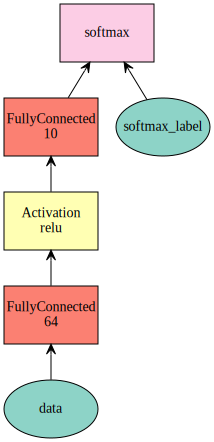

In [50]:
out = mx.sym.SoftmaxOutput(fc2, name='softmax')
mx.viz.plot_network (symbol=out)



In [51]:
mod = mx.mod.Module(out) # create a module by given a Symbol, here is "out"

### Building the data iterator


We can iterate on the data set, <b>10 samples and 10 labels at a time.</b> We then call the reset() function to restore the iterator to its original state.

In [52]:
train_iter = mx.io.NDArrayIter(data=X_train,label=Y_train,batch_size=batch)

### Training the model

First, let’s bind the input symbol to the actual data set (samples and labels). This is where the iterator comes in handy.

In [53]:
mod.bind(data_shapes=train_iter.provide_data, label_shapes=train_iter.provide_label) ## create memory by given input shapes


Next, let’s initialize the neuron weights in the network. This is actually a very important step: initializing them with the “right” technique will help the network learn much faster. The <b>Xavier initializer</b> is one of these techniques.

In [54]:
mod.init_params(initializer=mx.init.Xavier(magnitude=2.))


Next, we need to define the <b>optimization parameters:</b> <br>
1) We’re using the Stochastic <b>Gradient Descent algorithm (aka SGD)</b> <br>
2) We’re setting the learning rate to 0.1, a pretty typical value for SGD.

In [55]:
mod.init_optimizer(optimizer='sgd', optimizer_params=(('learning_rate', 0.1), ))

And finally, we can <b>train the network!</b> We’re doing it over 50 epochs, which means the full data set will flow over 50 times through the network (in batches of 10 samples).

In [56]:
mod.fit(train_iter, num_epoch=60)

/opt/anaconda3/lib/python3.8/site-packages/mxnet/module/base_module.py:501: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  self.init_params(initializer=initializer, arg_params=arg_params, aux_params=aux_params,
INFO:root:Epoch[0] Train-accuracy=0.100000
INFO:root:Epoch[0] Time cost=0.056
INFO:root:Epoch[1] Train-accuracy=0.130000
INFO:root:Epoch[1] Time cost=0.037
INFO:root:Epoch[2] Train-accuracy=0.145000
INFO:root:Epoch[2] Time cost=0.037
INFO:root:Epoch[3] Train-accuracy=0.173750
INFO:root:Epoch[3] Time cost=0.036
INFO:root:Epoch[4] Train-accuracy=0.175000
INFO:root:Epoch[4] Time cost=0.037
INFO:root:Epoch[5] Train-accuracy=0.191250
INFO:root:Epoch[5] Time cost=0.037
INFO:root:Epoch[6] Train-accuracy=0.211250
INFO:root:Epoch[6] Time cost=0.037
INFO:root:Epoch[7] Train-accuracy=0.236250
INFO:root:Epoch[7] Time cost=0.036
INFO:root:Epoch[8] Train-accuracy=0.258750
INFO:root:Epoch[8] Time cost=0.037
INFO:root:Epoch[9] Train-accuracy=0.2762

As we can see, the training accuracy rises rapidly and reaches 99+% after 50 epochs. It looks like our network was able to learn the training set. 